## Aim

Compare the coverage of the Signor network with the markers measured and the overexpressions performed

This version adapted to the reviewer comment:

"Reviewer #3:

Remarks to the Author:

   The revised manuscript submitted by Bodenmiller and colleagues addresses in a satisfactory manner most of the referees’ comments and criticisms with new controls, experiments and analyses.
I only have the following additional remark I could not find a description of the algorithm used to obtain the shortest “directed” path in SIGNOR to be correlated with the experimental correlation.
I am wondering whether in their analysis the authors took in consideration the sign associated to the path that should correlate with the sign of the experimental correlation. To make a simple example, let’s consider two pairs of proteins that correlate experimentally with a positive sign.  According to the signed directed network protein A directly activates the phosphorylation of B while protein C directly dephosphorylates protein D, In both cases the network distance is 1 but only the correlation of A with B is in accord with the experimental results
"

In [132]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, HTML
import os
%matplotlib inline

In [3]:
# The complete signor network
signor_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/20160110_signor_all_data.tsv'

In [4]:
# The antibody names in uniprot
antibody_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/201610_antibody_uniprot.csv'


In [5]:
# The overexpressions in uniprot
overexp_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/201602_gene_uniprot.csv'

In [159]:
outfolder ='/home/vitoz/imls-bod/Xiao-Kang/EGF transfection/benchmark'

In [163]:
# ignored effects due to spillove
ignored_fn ='/home/vitoz/imls-bod/Xiao-Kang/EGF transfection/benchmark/20161020_ignored_relations.csv'

In [218]:
# Effect mechanism filters for signor
not_used_effects = pd.read_csv(ignored_fn)

In [7]:
signor_tab = pd.read_csv(signor_fn, sep='\t')

In [20]:
signor_tab

,EntityA,TypeA,IdA,DatabaseA,EntityB,TypeB,IdB,DatabaseB,Effect,EffectMechanism,...,PreModificationA,PreModificationASequences,PreModificationB,PreModificationBSeqeunces,Pmid,Direct,GeneralNotes,Annotator,Sentence,Relation_ac
0,CSNK2A1,PROTEIN,P68400,UNIPROT,SLK,PROTEIN,Q9H2G2,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16837460.0,YES,NaN,gcesareni,Slk down-regulation by v-src is indirect and i...,SIGNOR-147879
1,CSNK2A1,PROTEIN,P68400,UNIPROT,SLK,PROTEIN,Q9H2G2,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16837460.0,YES,NaN,gcesareni,Slk down-regulation by v-src is indirect and i...,SIGNOR-147883
2,DUSP4,PROTEIN,Q13115,UNIPROT,MAPK14,PROTEIN,Q16539,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16849326.0,YES,NaN,gcesareni,This result suggests that dusp4 represses gluc...,SIGNOR-147958
3,PTPRA,PROTEIN,P18433,UNIPROT,KCNB1,PROTEIN,Q14721,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16870705.0,YES,NaN,gcesareni,Ptpalpha inhibits kv channels more strongly th...,SIGNOR-148301
4,CTDSP1,PROTEIN,Q9GZU7,UNIPROT,SMAD1,PROTEIN,Q15797,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16882717.0,YES,NaN,lpetrilli,"In human cells, rnai-mediated depletion of scp...",SIGNOR-148396
5,CTDSP2,PROTEIN,O14595,UNIPROT,SMAD1,PROTEIN,Q15797,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16882717.0,YES,NaN,lpetrilli,"In human cells, rnai-mediated depletion of scp...",SIGNOR-148434
6,FBXW11,PROTEIN,Q9UKB1,UNIPROT,CLSPN,PROTEIN,Q9HAW4,UNIPROT,down-regulates,ubiquitination,...,NaN,NaN,NaN,NaN,16885021.0,YES,NaN,gcesareni,Claspin degradation was triggered by its inter...,SIGNOR-148438
7,PLK1,PROTEIN,P53350,UNIPROT,CLSPN,PROTEIN,Q9HAW4,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16885021.0,YES,NaN,gcesareni,"We show that claspin, an adaptor protein requi...",SIGNOR-148442
8,PLK1,PROTEIN,P53350,UNIPROT,CLSPN,PROTEIN,Q9HAW4,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16885022.0,YES,NaN,gcesareni,"We show that claspin, an adaptor protein requi...",SIGNOR-148447
9,CP,PROTEIN,P00450,UNIPROT,SMO,PROTEIN,Q99835,UNIPROT,down-regulates,binding,...,NaN,NaN,NaN,NaN,16885213.0,YES,NaN,gcesareni,Genetic and biochemical studies imply that smo...,SIGNOR-148451


Read the network

Make a dict for the names

In [9]:
signor_dict = {k: v for k,v in zip(signor_tab['IdA'],signor_tab['EntityA'])}
signor_dict.update({k: v for k,v in zip(signor_tab['IdB'],signor_tab['EntityB'])})


    Read the antibody and gene information

In [10]:
overexp_tab = pd.read_csv(overexp_fn)
overexp_tab.head(2)

overexp_dict = {k: v for k,v in zip(overexp_tab['gene_xkl'],overexp_tab['UniProt'])}

In [11]:
antibody_tab = pd.read_csv(antibody_fn)
antibody_tab.head(2)

antibody_dict= dict()
for ab, tab in antibody_tab.groupby('Antibody'):
    if not(tab['UniProt'].isnull().values.any()):
        antibody_dict[ab] = set(tab['UniProt'])
        
    

In [40]:
antibody_tab

,Isotope,Antibody,Antigen,Immunogen,Residue,Phospho,Supplier,Clone,Staining Concentration [μg/ml],UniProt
0,La139,p-CREB,p-CREB1,Ser133,Ser133,1,BD,J151-21,1.00,P16220
1,La139,p-CREB,p-AFT1,Ser63,Ser63,1,BD,J151-21,1.00,P18846
2,Pr141,p-STAT5,p-STAT5,Tyr694,Tyr694,1,BD,47/Stat5,2.00,P42229
3,Nd142,p-SHP2,p-SHP2,Tyr580,Tyr580,1,CST,D66F10,4.00,Q06124
4,Nd143,p-FAK,p-FAK,Tyr397,Tyr397,1,CST,Polyclonal,2.00,Q05397
5,Nd144,p-MEK1-2,p-MEK1,Ser221,Ser221,1,CST,166F8,2.00,Q02750
6,Nd144,p-MEK1-2,p-MEK2,Ser221,Ser221,1,CST,166F8,2.00,P36507
7,Nd145,p-MAPKAPK2,p-MAPKAPK2,Thr334,Thr334,1,CST,27B7,1.00,P49137
8,Nd146,p-p70S6K,p-p70S6K,Thr389,Thr389,1,CST,1A5,1.00,P23443
9,Sm147,p-MKK3,p-MKK3,Thr222,Thr222,1,Assay Biotechnology,Polyclonal,2.00,P46734


In [60]:
antibody_dict_extended= dict()
for ab, tab in antibody_tab.groupby('Antibody'):
    if not(tab['UniProt'].isnull().values.any()):
       cur_entry = [(row['UniProt'],row['Residue'].split('/'), row['Phospho'])  for idx, row in tab.iterrows()]
       antibody_dict_extended.update({ab: cur_entry})

In [61]:
antibody_dict_extended

{'Beta-catenin': [('P35222', ['Ser33', 'Ser37', 'Thr41'], -1)],
 'E-cadherin': [('P12830', ['Cytoplasmic domain'], 0)],
 'p-4EBP1': [('Q13541', ['Thr37'], 1), ('Q13541', ['Thr46'], 1)],
 'p-AKT': [('P31749', ['Ser473'], 1),
  ('P31751', ['Ser473'], 1),
  ('Q9Y243', ['Ser473'], 1)],
 'p-AMPKalpha': [('Q13131', ['Thr172'], 1)],
 'p-BTK': [('Q06187', ['Tyr551'], 1), ('Q08881', ['Tyr551'], 1)],
 'p-CREB': [('P16220', ['Ser133'], 1), ('P18846', ['Ser63'], 1)],
 'p-ERK1-2': [('P27361', ['Thr202'], 1), ('P28482', ['Tyr204'], 1)],
 'p-FAK': [('Q05397', ['Tyr397'], 1)],
 'p-GSK3-Beta': [('P49841', ['Ser9'], 1)],
 'p-HH3': [('P68431', ['Ser28'], 1)],
 'p-JNK': [('P45983', ['Thr183'], 1),
  ('P45984', ['Thr183'], 1),
  ('P53779', ['Thr183'], 1),
  ('P45983', ['Tyr185'], 1),
  ('P45984', ['Tyr185'], 1),
  ('P53779', ['Tyr185'], 1)],
 'p-MAPKAPK2': [('P49137', ['Thr334'], 1)],
 'p-MARCKS': [('P29966', ['Ser167'], 1), ('P29966', ['Ser170'], 1)],
 'p-MEK1-2': [('Q02750', ['Ser221'], 1), ('P36507', ['

# Generate the graph

It needs to be a multidigraph to allow for parallel edges

In [12]:
g = nx.MultiDiGraph()

for idx, row in signor_tab.iterrows():
    g.add_edge(row['IdA'], row['IdB'], attr_dict=dict((col, row[col]) for col in ['Effect', 'EffectMechanism',
       'MechanismResidues', 'MechanismSequences','Direct', 'Sentence']))




g= nx.from_pandas_dataframe(signor_tab,'IdA','IdB',edge_attr=[u'Effect', u'EffectMechanism',
       u'MechanismResidues', u'MechanismSequences',u'Direct'], create_using=nx.MultiDiGraph())

Check if the graph contains all measured antibodies/overexpressions

In [13]:
xkl_nodes = np.unique(overexp_tab['UniProt'].dropna().tolist() + antibody_tab['UniProt'].dropna().tolist())

all_nodes = g.nodes()
signor_xkl_nodes = [n for n in all_nodes if n in xkl_nodes]
len(signor_xkl_nodes) == len(xkl_nodes)

True

-> All relevant species are present

## Check the average shortest path length between overexpressions and phosphoproteins

Calculate pairwise shortest path distance, taking the minimum distanc if the antibody is not specific

In [14]:
col = antibody_dict.keys()
row = overexp_tab['gene_xkl']

pair_sp = np.empty((len(row), len(col)))
pair_sp[:] = np.NAN
for i, over in enumerate(row):
    for j, ab in enumerate(col):
        sp = list()
        for ab_prot in antibody_dict[ab]:
            ov_prot = overexp_dict[over]
            try:
                sp.append(nx.shortest_path_length(g, ov_prot, ab_prot))
            except nx.NetworkXNoPath:
                pass
        if len(sp) > 0:
            pair_sp[i,j] = np.min(sp)
        else:
            pair_sp[i,j] = 10
 



In [15]:
pair_dat = pd.DataFrame(pair_sp,columns=col, index=row)
pair_dat = pair_dat.stack()
pair_dat.index = pair_dat.index.rename(['marker','target'])

Look at the distribution

count    640.000000
mean       3.181250
std        1.979937
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
dtype: float64

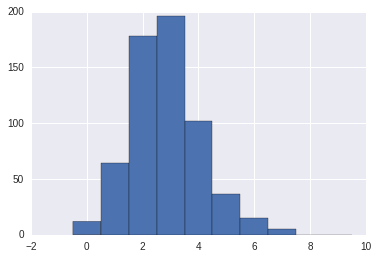

In [16]:
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
pair_dat.hist(bins=bins)
pair_dat.describe()

# As proposed by the reviewer: make a signed version

Check for each shortest path which sign is predicted.

Save two versions: positive and negative

Algorithm: 
- Get all shortest path with  nx.all_shortest_paths(g, source, target)
- calculate the sign based on the annotation of the interaction
- If any 

set(entry[1]['Effect'] for e in g.edge.items() for egroup in e[1].items() for entry in egroup[1].items())

set((entry[1]['EffectMechanism'], entry[1]['Effect'])  for e in g.edge.items() for egroup in e[1].items() for entry in egroup[1].items())

The problem here is that it is not trivial to assign positive and negative interactions.

Lets simplify and make a new network only having entities that are indicated to down or upregulate

In [31]:
g_updown = g.copy()

In [32]:
g_updown.edges()

[('Q6ZVD8', 'P17252'),
 ('Q6ZVD8', 'P05771'),
 ('Q6ZVD8', 'P31749'),
 ('Q6ZVD8', 'Q9Y243'),
 ('P31749', 'P09601'),
 ('P31749', 'Q15942'),
 ('P31749', 'P53804'),
 ('P31749', 'O43521'),
 ('P31749', 'Q15672'),
 ('P31749', 'P03372'),
 ('P31749', 'P03372'),
 ('P31749', 'P03372'),
 ('P31749', 'P03372'),
 ('P31749', 'O43524'),
 ('P31749', 'O43524'),
 ('P31749', 'O43524'),
 ('P31749', 'O43524'),
 ('P31749', 'Q16875'),
 ('P31749', 'P14598'),
 ('P31749', 'P14598'),
 ('P31749', 'Q99683'),
 ('P31749', 'P18031'),
 ('P31749', 'Q15027'),
 ('P31749', 'Q7Z6J0'),
 ('P31749', 'Q16584'),
 ('P31749', 'P98170'),
 ('P31749', 'Q06413'),
 ('P31749', 'P15976'),
 ('P31749', 'Q9UQC2'),
 ('P31749', 'Q9BZQ8'),
 ('P31749', 'P23769'),
 ('P31749', 'P17542'),
 ('P31749', 'P53365'),
 ('P31749', 'Q12778'),
 ('P31749', 'Q12778'),
 ('P31749', 'Q12778'),
 ('P31749', 'Q12778'),
 ('P31749', 'Q12778'),
 ('P31749', 'Q12778'),
 ('P31749', 'Q12778'),
 ('P31749', 'SIGNOR-C7'),
 ('P31749', 'Q13043'),
 ('P31749', 'Q13043'),
 ('P3174

In [33]:
for e in set(g_updown.edges()):
    for key, item in g_updown.edge[e[0]][e[1]].items():
        e_dat = item
        if (e_dat['Effect'].startswith('down-regulates')):
            e_dat.update(({'mode':-1}))
        elif (e_dat['Effect'].startswith('up-regulates')):
            e_dat.update(({'mode':1}))
        else:
            e_dat.update(({'mode':0}))

In [34]:
g_updown.edge[e[0]][e[1]]

{0: {'Direct': 'YES',
  'Effect': 'down-regulates activity',
  'EffectMechanism': 'binding',
  'MechanismResidues': nan,
  'MechanismSequences': nan,
  'Sentence': 'On the other hand, Smad6 competes with R-Smad and forms a non-functional complex with Smad4, which will inhibit BMP signaling in bone formation. Smad6 is involved in a negative feedback loop regulating BMP signaling and is required to limit BMP signaling during endochondral bone formation.',
  'mode': -1}}

How many edges do we lose:

In [35]:
dif = len(g_updown.edges())-len(g.edges())
print(dif)
print(abs(dif)/float(len(g.edges())))

0
0.0


Which is quite low compared to the over 8000 edges in the network.

Make a function that gives the shortest path given the network and a sign

In [64]:
def get_shortest_dir_path(graph, origin, target, mode, maxlen=6, target_residues=None, phospho_dir=1):

    cur_len = nx.shortest_path_length(graph, origin, target)
    
    if cur_len == 0:
        return [origin]
    while cur_len <= maxlen:
        pathgen = nx.all_simple_paths(graph, origin, target, cutoff=cur_len)
        
        prev_paths = set()
        for path in pathgen:
            path = tuple(path)
            if path not in prev_paths:
                curmode = get_overal_mode(graph, path, target_residues=target_residues, phospho_dir=phospho_dir)
                if (curmode == mode) | (mode == 0):
                    return path
                else:
                    prev_paths.add(path)
            
        cur_len += 1
            
    raise(nx.NetworkXNoPath)
    
def get_overal_mode(graph, nodes, target_residues=None, phospho_dir=1):
    """
    """
    if target_residues is None:
        target_residues = []
    modes = list()
    for i in range(len(nodes)-1):
        
        idx, edges = zip(*graph.edge[nodes[i]][nodes[i+1]].items())
        if (i == len(nodes)-2):
            ## for the last node, check if it is a phosphorylation and if any of the target sites is in there
            ## if it is, check if it is 'dephosphorylation' or 'phosphorylation' and set sign accordingly.
            ## default back to 'mode'
            curmod = set()
            for e in edges:
                if e['MechanismResidues'] in target_residues:
                    if e['EffectMechanism'] == 'phosphorylation':
                        curmod.add(phospho_dir)
                    elif e['EffectMechanism'] == 'dephosphorylation':
                        curmod.add(phospho_dir*-1)
                    else:
                        curmod.add(0)
                else:
                    curmod.add(e['mode']*phospho_dir)        
        else:
            # take the annotation mode as mode
            curmod = set(e['mode'] for e in edges)
        if len(curmod) > 1:
            return 0
        else:
            modes.append(curmod.pop())
            
    overal_mode = np.prod(modes)
    return overal_mode

In [37]:
#get_shortest_dir_path(g_updown, origin='P68400', target='Q9H2G2', mode=1)
g_updown.edge['P68400']['Q9H2G2']

{0: {'Direct': 'YES',
  'Effect': 'down-regulates',
  'EffectMechanism': 'phosphorylation',
  'MechanismResidues': 'Ser347',
  'MechanismSequences': 'SSDLSIAsSEEDKLS',
  'Sentence': 'Slk down-regulation by v-src is indirect and is accompanied by slk hyperphosphorylation on serine residues. Deletion analysis revealed that casein kinase ii (ck2) sites at position 347/348 are critical for v-src-dependent modulation of slk activity.',
  'mode': -1},
 1: {'Direct': 'YES',
  'Effect': 'down-regulates',
  'EffectMechanism': 'phosphorylation',
  'MechanismResidues': 'Ser348',
  'MechanismSequences': 'SDLSIASsEEDKLSQ',
  'Sentence': 'Slk down-regulation by v-src is indirect and is accompanied by slk hyperphosphorylation on serine residues. Deletion analysis revealed that casein kinase ii (ck2) sites at position 347/348 are critical for v-src-dependent modulation of slk activity.',
  'mode': -1}}

In [38]:
nx.shortest_path_length(g_updown, 'P68400', 'Q9H2G2')
pathgen = nx.all_simple_paths(g_updown, 'P68400', 'Q9H2G2', cutoff=1)
for p in pathgen:
    print(get_overal_mode(g_updown, p))

-1
-1


In [76]:
def calc_disttable_signed(g, antibody, overexpression, direction, antibody_dict, overexp_dict):
    col = antibody
    row = overexpression

    pair_tab = np.empty((len(row), len(col)))
    pair_tab[:] = np.NAN
    for i, over in enumerate(row):
        for j, ab in enumerate(col):
            sp = list()
            for ab_prot in antibody_dict[ab]:
                ov_prot = overexp_dict[over]

                try:
                    sp.append(len(get_shortest_dir_path(g, ov_prot, ab_prot, direction))-1)
                except nx.NetworkXNoPath:
                    1
            if len(sp) > 0:
                pair_tab[i,j] = np.min(sp)
            else:
                pair_tab[i,j] = np.NaN
    pair_dat = pd.DataFrame(pair_tab,columns=col, index=row)
    pair_dat = pair_dat.stack(dropna=False)
    pair_dat.index = pair_dat.index.rename(['marker','target'])
    return pair_dat
    


pair_sp_pos = calc_disttable_signed(g=g_updown,
                                    antibody=antibody_dict.keys(), 
                      overexpression=overexp_tab['gene_xkl'],
                      direction=1,
                      antibody_dict=antibody_dict,
                      overexp_dict=overexp_dict
                     )
pair_sp_neg = calc_disttable_signed(g=g_updown, antibody=antibody_dict.keys(), 
                      overexpression=overexp_tab['gene_xkl'],
                      direction=-1,
                      antibody_dict=antibody_dict,
                      overexp_dict=overexp_dict
                     )




In [77]:
def calc_disttable_signed_v2(g, antibody, overexpression, direction, antibody_dict_ext, overexp_dict):
    col = antibody
    row = overexpression

    pair_tab = np.empty((len(row), len(col)))
    pair_tab[:] = np.NAN
    for i, over in enumerate(row):
        for j, ab in enumerate(col):
            sp = list()
            for ab_prot, target_resid, phospho_dir in antibody_dict_ext[ab]:
                ov_prot = overexp_dict[over]
                

                try:
                    sp.append(len(get_shortest_dir_path(g, ov_prot, ab_prot, direction,target_residues=target_resid,
                                                        phospho_dir=phospho_dir))-1)
                except nx.NetworkXNoPath:
                    1
            if len(sp) > 0:
                pair_tab[i,j] = np.min(sp)
            else:
                pair_tab[i,j] = np.NaN
    pair_dat = pd.DataFrame(pair_tab,columns=col, index=row)
    pair_dat = pair_dat.stack(dropna=False)
    pair_dat.index = pair_dat.index.rename(['marker','target'])
    return pair_dat
    


pair_dat_pos_2 = calc_disttable_signed_v2(g=g_updown,
                                    antibody=antibody_dict_extended.keys(), 
                      overexpression=overexp_tab['gene_xkl'],
                      direction=1,
                      antibody_dict_ext=antibody_dict_extended,
                      overexp_dict=overexp_dict
                     )
pair_dat_neg_2 = calc_disttable_signed_v2(g=g_updown, antibody=antibody_dict_extended.keys(), 
                      overexpression=overexp_tab['gene_xkl'],
                      direction=-1,
                      antibody_dict_ext=antibody_dict_extended,
                      overexp_dict=overexp_dict
                     )


count    592.000000
mean       3.128378
std        1.293118
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max        6.000000
dtype: float64

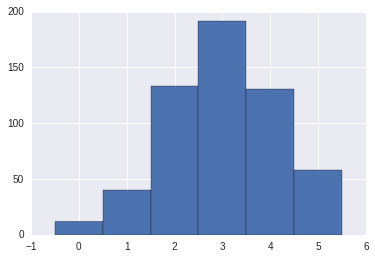

In [78]:
bins = np.arange(int(np.ceil(pair_dat_pos.max()))+1)-0.5
pair_dat_pos.hist(bins=bins)
pair_dat_pos.describe()

count    573.000000
mean       3.092496
std        1.276535
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max        6.000000
dtype: float64

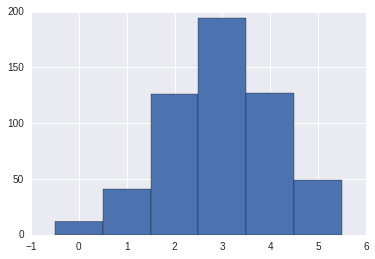

In [79]:
bins = np.arange(int(np.ceil(pair_dat_pos_2.max()))+1)-0.5
pair_dat_pos_2.hist(bins=bins)
pair_dat_pos_2.describe()

count    577.000000
mean       3.266898
std        1.161370
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max        6.000000
dtype: float64

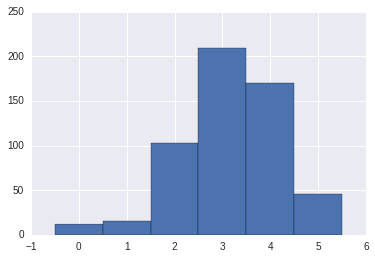

In [80]:
bins = np.arange(int(np.ceil(pair_dat_neg_2.max()))+1)-0.5
pair_dat_neg_2.hist(bins=bins)
pair_dat_neg_2.describe()

count    592.000000
mean       3.128378
std        1.293118
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max        6.000000
dtype: float64

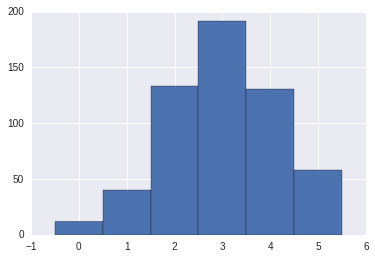

In [81]:
bins = np.arange(int(np.ceil(pair_dat_neg.max()))+1)-0.5
pair_dat_neg.hist(bins=bins)
pair_dat_neg.describe()

## Look at the minium number of measured nodes at the shortest path

In [36]:
def get_min_measured_nodes_shortest_path(g, source, target, measured_nodes):
    """
    
    """

    
    try:
        sp = nx.shortest_path(g, source, target)
    except nx.NetworkXNoPath:
        return 10

    sp = nx.all_shortest_paths(g, source, target)
        
    n_measured_between = max(sum(1 for n in nl if n in measured_nodes) for nl in sp)
    
    return n_measured_between

col = antibody_dict.keys()
row = overexp_tab['gene_xkl']

pair_sp_nbetween = np.empty((len(row), len(col)))
pair_sp_nbetween[:] = np.NAN
for i, over in enumerate(row):
    for j, ab in enumerate(col):
        sp = list()
        for ab_prot in antibody_dict[ab]:
            ov_prot = overexp_dict[over]
            try:
                sp.append(get_min_measured_nodes_shortest_path(g, ov_prot, ab_prot, set(xkl_nodes)))
            except nx.NetworkXNoPath:
                pass
        if len(sp) > 0:
            pair_sp_nbetween[i,j] = np.min(sp)-1
        else:
            pair_sp_nbetween[i,j] = 10

pair_dat_nbetween = pd.DataFrame(pair_sp_nbetween,columns=col, index=row)
pair_dat_nbetween = pair_dat_nbetween.stack()
pair_dat_nbetween.index = pair_dat_nbetween.index.rename(['marker','target'])

count    640.000000
mean       2.462500
std        1.750073
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
dtype: float64

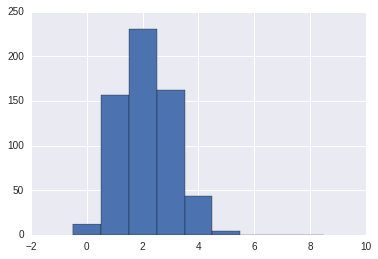

In [37]:
bins = np.arange(int(np.ceil(pair_dat_nbetween.max()))+1)-0.5
pair_dat_nbetween.hist(bins=bins)
pair_dat_nbetween.describe()

## Check consistency with bp-R2 analysis

In [85]:
bp_file = '/mnt/imls-bod/Xiao-Kang/EGF transfection/plots/nbin10_2.5perc_bpr2_median_25_final/t_bindat'

In [86]:
bin_dat = pd.read_pickle(bp_file)

In [87]:
print(bin_dat.index.get_level_values('target').unique())
print(bin_dat.index.get_level_values('marker').unique())

#pair_dat = pair_dat_nbetween

['Beta-catenin' 'E-cadherin' 'beads' 'cleaved PARP-cleaved caspase3'
 'cyclin B1' 'p-4EBP1' 'p-AKT' 'p-AMPKalpha' 'p-BTK' 'p-CREB' 'p-ERK1-2'
 'p-FAK' 'p-GSK3-Beta' 'p-HH3' 'p-JNK' 'p-MAPKAPK2' 'p-MARCKS' 'p-MEK1-2'
 'p-MKK3' 'p-MKK3-6' 'p-NfkB' 'p-PDPK1' 'p-PLCg2' 'p-RB' 'p-S6' 'p-SHP2'
 'p-SMAD1-5' 'p-SMAD2-3' 'p-STAT1' 'p-STAT3' 'p-STAT5' 'p-mTOR' 'p-p38'
 'p-p70S6K' 'p-p90RSK']
['AKT1' 'CRAF' 'GFP-FLAG-1' 'GSK3B' 'MAP2K1' 'MAP2K6' 'MAPK1' 'MAPK14'
 'PDPK1' 'RPS6KA1' 'SRC' 'empty-1' 'MAP2K7' 'BRAF' 'GFP-FLAG-2' 'HRAS'
 'KRAS' 'MAP3K5' 'MAP8' 'PIK3CA' 'PTPN11' 'RPS6' 'RPS6KB1' 'empty-2']


2.41441441441
2.0


(array([  9.,  18.,  32.,  30.,  15.,   6.,   1.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

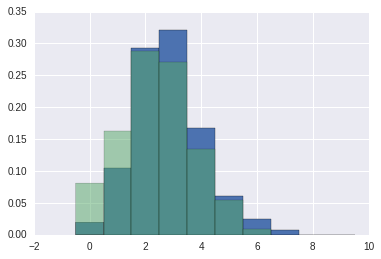

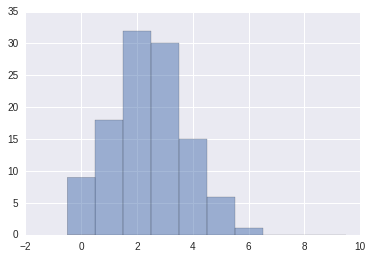

In [88]:
sig_dat = bin_dat.loc[bin_dat['bin_dat_sigfil_any']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> slight enrichment when considering all pairs significant in at least one timepoint

2.13235294118
2.0


(array([  9.,  13.,  22.,  13.,   7.,   3.,   1.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

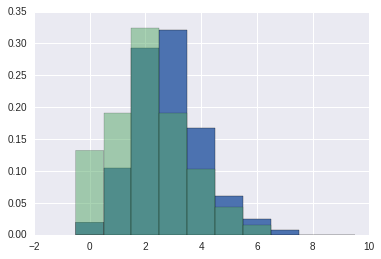

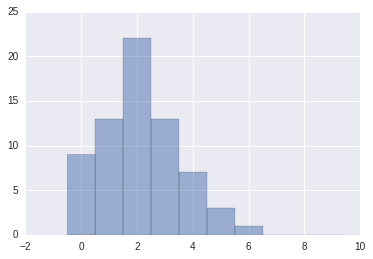

In [75]:
sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 0) & bin_dat['bin_dat_sigfil'] & (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']
plt.figure()

plt.hist(pair_dat, bins=bins,normed=True)



sp_dist_hits_ss = sig_dat.apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits_ss, bins=bins,normed=True, alpha=0.5)
sig_dat_0 = sig_dat.copy()
print(sp_dist_hits_ss.mean())
print(sp_dist_hits_ss.median())
plt.figure()
plt.hist(sp_dist_hits_ss, bins=bins, alpha=0.5)

-> stronger enrichment when considering  only significant pairs at steady state

2.71428571429
3.0


(array([ 0.,  3.,  6.,  8.,  2.,  2.,  0.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

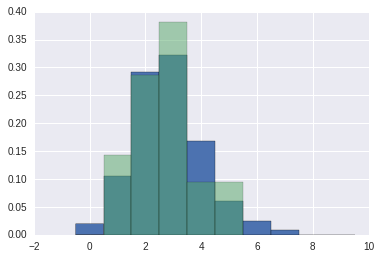

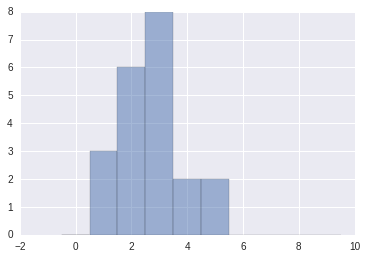

In [76]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 5) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()
plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> weaker enrichement when considering only after 5 min

2.84615384615
3.0


(array([  0.,   4.,   5.,  10.,   5.,   2.,   0.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

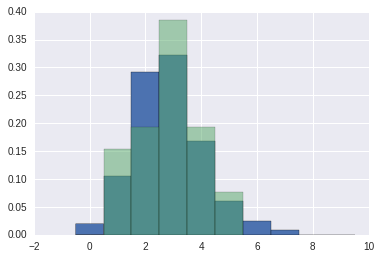

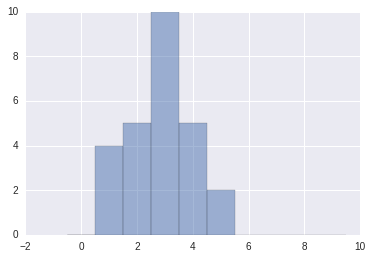

In [77]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 15) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()

plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)

print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> even weaker after only 15

2.76923076923
3.0


(array([ 0.,  2.,  1.,  8.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

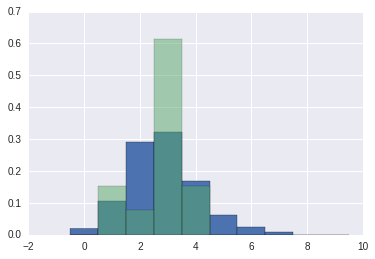

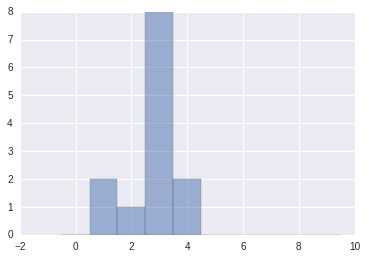

In [78]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 30) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()
plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> even less direct after 30

3.3
3.0


(array([ 0.,  1.,  0.,  5.,  3.,  1.,  0.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

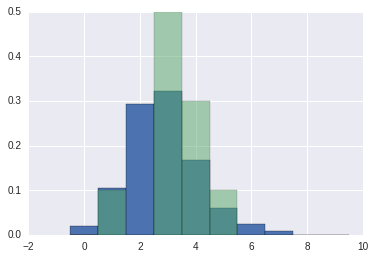

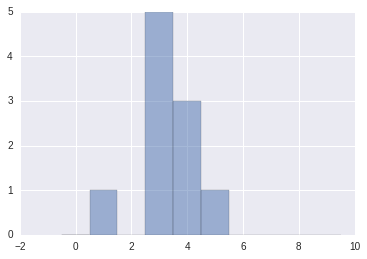

In [79]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 60) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()
plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> enriched for distant after 60 min

In [80]:
fil2 = (bin_dat.index.get_level_values('timepoint') == 0) & (bin_dat['bin_dat_sigfil'] == False)

sig_dat = bin_dat.loc[fil2 & (bin_dat.index.get_level_values('timepoint') == 5) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat.columns

MultiIndex(levels=[[u'counts', u'fit_var', u'median', u'overall_var', u'var_ratio', u'stats', u'bin_dat_sigfil', u'bin_dat_sigfil_any', u'bin_dat_sigfil_any_rep', u'target', u'origin', u'timepoint', u'row_col', u'perturbation', u'marker', u'experiment'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, u'mean_var_ratio', u'mean_mean_var_ratio', u'median_mean_var_ratio', u'nr_rep', u'corr_pearson_overall', u'corr_spearman_overall', u'median_corr_pearson_overall', u'median_corr_spearman_overall', u'median_abs_corr_pearson_overall', u'median_abs_corr_spearman_overall', u'corr_pearson_bin', u'corr_spearman_bin', u'', u'is_median_varratio']],
           labels=[[15, 14, 13, 12, 11, 10, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 8, 5], [22, 22, 22, 22, 22, 22, 22, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2

### Look at the hists at different distances

Add the distance to the bindat

In [84]:
sig_dat = bin_dat.loc[bin_dat['bin_dat_sigfil_any']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = sig_dat.apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
sig_dat = sig_dat.sort_values('dist', ascending=False)
plt.hist(sig_dat['dist'], bins=bins,normed=True, alpha=0.5)

NameError: name 'bin_dat' is not defined

,marker,target,timepoint,dist
187,RPS6KA1,p-BTK,0,6.0
198,RPS6KA1,E-cadherin,15,5.0
618,PTPN11,p-S6,0,5.0
142,PDPK1,p-BTK,0,5.0
552,MAP3K5,p-PDPK1,0,5.0
99,MAP2K6,p-MARCKS,5,5.0
39,GSK3B,p-BTK,5,5.0
225,SRC,p-BTK,0,4.0
628,RPS6KB1,p-ERK1-2,15,4.0
206,RPS6KA1,p-SHP2,15,4.0


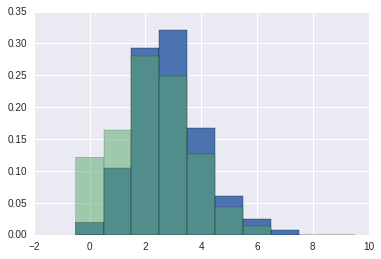

In [83]:
sig_dat = bin_dat.loc[ (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target','timepoint']].drop_duplicates(['marker', 'target','timepoint'])
sig_dat.columns = ['marker', 'target','timepoint']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = sig_dat.apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=False)
plt.hist(sig_dat['dist'], bins=bins,normed=True, alpha=0.5)

sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=True)
sig_dat = sig_dat.drop_duplicates(['marker', 'target'])
sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=False)
HTML(sig_dat.to_html())


Use the in 'measured nodes in between' distance


,marker,target,timepoint,dist
618,PTPN11,p-S6,0,5.0
552,MAP3K5,p-PDPK1,0,4.0
187,RPS6KA1,p-BTK,0,3.0
605,PIK3CA,p-MKK3-6,0,3.0
150,PDPK1,p-STAT5,0,3.0
149,PDPK1,p-SHP2,0,3.0
146,PDPK1,p-MKK3-6,0,3.0
144,PDPK1,p-MAPKAPK2,0,3.0
590,MAP8,p-STAT1,0,3.0
589,MAP8,p-MAPKAPK2,0,3.0


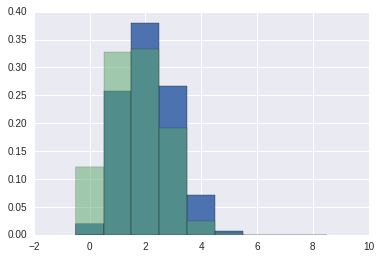

In [84]:
sig_dat = bin_dat.loc[ (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target','timepoint']].drop_duplicates(['marker', 'target','timepoint'])
sig_dat.columns = ['marker', 'target','timepoint']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat_nbetween.max()))+1)-0.5
plt.hist(pair_dat_nbetween, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = sig_dat.apply(lambda x: pair_dat_nbetween.loc[x['marker'], x['target']],axis=1)
sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=False)
plt.hist(sig_dat['dist'], bins=bins,normed=True, alpha=0.5)
sig_dat.loc[sig_dat['timepoint'] == 0]


In [85]:
sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 0) & bin_dat['bin_dat_sigfil'] & (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat.drop_duplicates(['marker', 'target'])
sig_dat =sig_dat[['marker', 'target','stats']]
sig_dat = sig_dat.drop_duplicates(['marker', 'target'])
fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = [pair_dat.loc[m,t] for m, t in zip(sig_dat['marker'], sig_dat['target'])]

In [86]:
sig_dat = sig_dat.sort_values('dist', ascending=False)
sig_dat.head(50)


marker       target          stats                      \
bin                       mean_var_ratio mean_mean_var_ratio   
34   RPS6KA1        p-BTK       0.315616            0.300311   
111   PTPN11         p-S6       0.111253            0.078277   
99    MAP3K5      p-PDPK1       0.240279            0.160567   
24     PDPK1        p-BTK       0.229966            0.157784   
35   RPS6KA1      p-PDPK1       0.205963            0.198352   
31     PDPK1       p-SHP2       0.197193            0.230670   
8      GSK3B       p-SHP2       0.132619            0.186044   
106     MAP8      p-STAT1       0.184516            0.134227   
105     MAP8   p-MAPKAPK2       0.198317            0.148633   
38       SRC        p-BTK       0.552237            0.429856   
94    MAP3K5  p-AMPKalpha       0.332298            0.229415   
32     PDPK1      p-STAT5       0.191210            0.210860   
42       SRC       p-SHP2       0.326601            0.244653   
26     PDPK1   p-MAPKAPK2       0.202156            0.173323   
86      HRAS        p-JNK       0.139110            0.140600   
87      HRAS    p-SMAD2-3       0.146353            0.100626   
19    MAP2K6      p-STAT5       0.105276            0.123801   
112   PTPN11    p-SMAD1-5       0.117378            0.100313   
41       SRC      p-PLCg2       0.535450            0.449002   
28     PDPK1     p-MKK3-6       0.356394            0.387629   
109   PIK3CA    p-SMAD1-5       0.110176            0.091571   
100   MAP3K5    p-SMAD1-5       0.161172            0.122146   
25     PDPK1        p-FAK       0.218151            0.226295   
108   PIK3CA     p-MKK3-6       0.163838            0.137148   
39       SRC     p-ERK1-2       0.397847            0.352432   
95    MAP3K5  p-GSK3-Beta       0.182046            0.131995   
45       SRC        p-p38       0.339381            0.273827   
96    MAP3K5        p-JNK       0.282534            0.278590   
97    MAP3K5   p-MAPKAPK2       0.265480            0.194200   
101   MAP3K5    p-SMAD2-3       0.161380            0.121722   
102   MAP3K5      p-STAT1       0.196949            0.146537   
107   PIK3CA        p-JNK       0.134235            0.106644   
110   PIK3CA        p-p38       0.140691            0.116666   
36   RPS6KA1     p-p70S6K       0.574913            0.609955   
0       AKT1      p-4EBP1       0.138566            0.120562   
15    MAP2K1    p-SMAD2-3       0.074702            0.110061   
30     PDPK1         p-S6       0.067834            0.160176   
3       AKT1     p-MKK3-6       0.250112            0.231342   
5       AKT1     p-p70S6K       0.103353            0.138569   
7      GSK3B       p-MKK3       0.445613            0.541483   
9      GSK3B      p-STAT1       0.444711            0.528702   
10     GSK3B     p-p70S6K       0.164617            0.173858   
11    MAP2K1      p-4EBP1       0.109297            0.118756   
18    MAP2K6      p-STAT1       0.135887            0.115212   
13    MAP2K1        p-HH3       0.116749            0.100236   
16    MAP2K1      p-STAT5       0.099056            0.155855   
98    MAP3K5     p-MKK3-6       0.563452            0.503213   
2       AKT1  p-GSK3-Beta       0.159553            0.122709   
4       AKT1    p-SMAD2-3       0.117003            0.107032   
103   MAP3K5        p-p38       0.317574            0.281742   

                                                                             \
bin median_mean_var_ratio nr_rep corr_pearson_overall corr_spearman_overall   
34               0.315616    3.0             0.584967              0.580810   
111              0.111253    3.0            -0.321279             -0.296527   
99               0.147494    3.0             0.573019              0.598470   
24               0.214085    3.0             0.458794              0.455568   
35               0.205963    3.0             0.505724              0.502957   
31               0.245179    3.0             0.474483              0.355991   
8                0.169928    3.0             

## investigate how many of the 'close' relationships where recovered

In [87]:
sig_dat = bin_dat.reset_index(drop=False)
#sig_dat =sig_dat.drop_duplicates(['marker', 'target'])
fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = [pair_dat.loc[m,t] for m, t in zip(sig_dat['marker'], sig_dat['target'])]

In [88]:
fil = (sig_dat['dist'] <2)& (sig_dat['timepoint'] == 5)
#
sig_dat.loc[fil]['bin_dat_sigfil_any'].mean()


fil = sig_dat['timepoint'] == 0
[sig_dat.loc[fil & (sig_dat['dist'] == i)]['bin_dat_sigfil'].mean() for i in range(10)]

[0.75,
 0.21311475409836064,
 0.13017751479289941,
 0.068783068783068779,
 0.068627450980392163,
 0.081081081081081086,
 0.066666666666666666,
 0.0,
 nan,
 nan]

In [89]:
fil = (sig_dat['bin_dat_sigfil_any'])
#

print((sig_dat.loc[fil]['dist'] >1).mean())
print((sig_dat.loc[fil]['dist'] <2).mean())
print((sig_dat.loc[fil]['dist'] >5).mean())



0.756756756757
0.243243243243
0.00900900900901


# With the signed directed network

In [89]:
sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 0) & bin_dat['bin_dat_sigfil'] & (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat.groupby(['marker', 'target']).apply(lambda x: np.sign(x[('stats', 'corr_spearman_bin')].mean()))
sig_dat.name = 'sign'
sig_dat = sig_dat.reset_index(drop=False)

2.39705882353
2.0


(array([  9.,  10.,  18.,  15.,  10.,   4.,   2.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

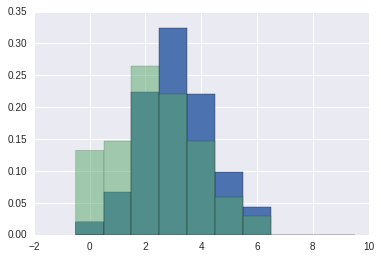

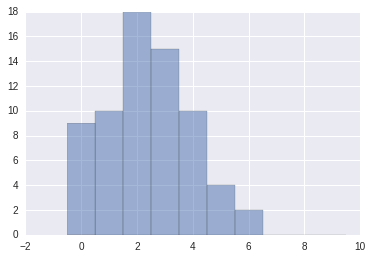

In [220]:
plt.hist(pair_dat_pos.append(pair_dat_neg).dropna(), bins=bins,normed=True)


fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

def _get_data(x):
    if x['sign'] > 0:
        return(pair_dat_pos.loc[x['marker'], x['target']])
    else:
        return(pair_dat_neg.loc[x['marker'], x['target']])

sp_dist_hits_sign = sig_dat.loc[fil].apply(lambda x: _get_data(x),axis=1)

sp_dist_hits_nonsign = sig_dat.apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)

#plt.hist(sp_dist_hits_nonsign.dropna(), bins=bins,normed=True, alpha=0.5)
plt.hist(sp_dist_hits_sign.dropna(), bins=bins,normed=True, alpha=0.5)

sig_dat_0 = sig_dat.copy()
print(sp_dist_hits_sign.mean())
print(sp_dist_hits_sign.median())
plt.figure()
plt.hist(sp_dist_hits_sign, bins=bins, alpha=0.5)

In [221]:
from IPython.display import display, HTML

overexp_tab = overexp_tab.set_index('gene_xkl',drop=False)
full_dat = pd.concat([sig_dat.loc[fil].reset_index(drop=True),
                      pd.DataFrame({'dist nonsign':sp_dist_hits_nonsign}).reset_index(drop=True),
                      pd.DataFrame({'dist sign':sp_dist_hits_sign}).reset_index(drop=True),
                      pd.DataFrame({'protein': overexp_tab.loc[sig_dat.loc[fil,'marker'],'Overexpressed proteins'].reset_index(drop=True)})], axis=1)

HTML(full_dat.sort_values('dist sign').to_html())


,marker,target,sign,dist nonsign,dist sign,protein
33,MAP8,p-JNK,1.0,0.0,0.0,JNK1
36,MAPK1,p-ERK1-2,1.0,0.0,0.0,ERK2
19,MAP2K6,p-MKK3-6,1.0,0.0,0.0,MKK6
38,MAPK14,p-p38,1.0,0.0,0.0,p38a
16,MAP2K1,p-MEK1-2,1.0,0.0,0.0,MEK1
58,RPS6KA1,p-p90RSK,1.0,0.0,0.0,p90RSK
44,PDPK1,p-PDPK1,1.0,0.0,0.0,PDK1
1,AKT1,p-AKT,1.0,0.0,0.0,AKT1
6,GSK3B,p-GSK3-Beta,1.0,0.0,0.0,GSK3b
59,RPS6KB1,p-S6,-1.0,1.0,1.0,p70S6K


In [223]:
fil = (pair_dat.index.get_level_values('marker').isin(not_used_effects['marker']) &
       pair_dat.index.get_level_values('target').isin(not_used_effects['target'])) == False 

2.22222222222
2.0


(array([  9.,   8.,  14.,  11.,   9.,   3.,   0.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

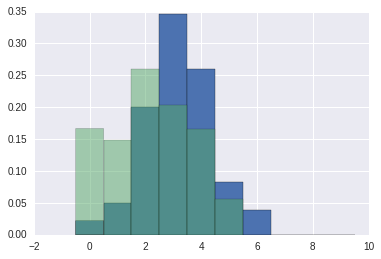

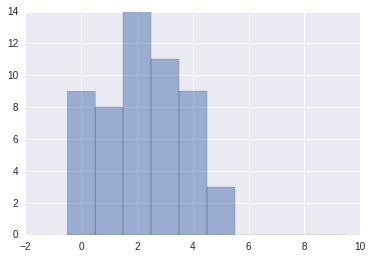

In [225]:
pair_dat_pos_neg = pair_dat_pos_2.append(pair_dat_neg_2).dropna()

fil = (pair_dat_pos_neg.index.get_level_values('marker').isin(not_used_effects['marker']) &
       pair_dat_pos_neg.index.get_level_values('target').isin(not_used_effects['target'])) == False 

plt.hist(pair_dat_pos_neg.loc[fil], bins=bins,normed=True)


fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys())) & (sig_dat['marker'].isin(not_used_effects['marker']) &
       sig_dat['target'].isin(not_used_effects['target'])) == False 


def _get_data(x):
    if x['sign'] > 0:
        return(pair_dat_pos_2.loc[x['marker'], x['target']])
    else:
        return(pair_dat_neg_2.loc[x['marker'], x['target']])

sp_dist_hits_sign = sig_dat.loc[fil].apply(lambda x: _get_data(x),axis=1)

sp_dist_hits_nonsign = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)

#plt.hist(sp_dist_hits_nonsign.dropna(), bins=bins,normed=True, alpha=0.5)
plt.hist(sp_dist_hits_sign.dropna(), bins=bins,normed=True, alpha=0.5)

sig_dat_0 = sig_dat.copy()
print(sp_dist_hits_sign.mean())
print(sp_dist_hits_sign.median())
plt.figure()
plt.hist(sp_dist_hits_sign, bins=bins, alpha=0.5)

In [226]:
from IPython.display import display, HTML

overexp_tab = overexp_tab.set_index('gene_xkl',drop=False)
full_dat = pd.concat([sig_dat.loc[fil].reset_index(drop=True),
                      pd.DataFrame({'dist nonsign':sp_dist_hits_nonsign}).reset_index(drop=True),
                      pd.DataFrame({'dist sign':sp_dist_hits_sign}).reset_index(drop=True),
                      pd.DataFrame({'protein': overexp_tab.loc[sig_dat.loc[fil,'marker'],'Overexpressed proteins'].reset_index(drop=True)})], axis=1)

HTML(full_dat.sort_values('dist sign').to_html())


,marker,target,sign,dist nonsign,dist sign,protein
16,MAP2K6,p-MKK3-6,1.0,0.0,0.0,MKK6
35,MAPK14,p-p38,1.0,0.0,0.0,p38a
30,MAP8,p-JNK,1.0,0.0,0.0,JNK1
37,PDPK1,p-PDPK1,1.0,0.0,0.0,PDK1
13,MAP2K1,p-MEK1-2,1.0,0.0,0.0,MEK1
47,RPS6KA1,p-p90RSK,1.0,0.0,0.0,p90RSK
33,MAPK1,p-ERK1-2,1.0,0.0,0.0,ERK2
1,AKT1,p-AKT,1.0,0.0,0.0,AKT1
6,GSK3B,p-GSK3-Beta,1.0,0.0,0.0,GSK3b
2,AKT1,p-GSK3-Beta,1.0,1.0,1.0,AKT1


In [228]:
def get_path(origin, target, sign):
    origin_prot = overexp_dict[origin]
    paths = list()
    
    for target_prot, target_sites, phospho_dir in antibody_dict_extended[target]:
        try:
            paths.append(get_shortest_dir_path(g_updown, origin_prot, target_prot, sign,
                                   target_residues=target_sites,phospho_dir=phospho_dir))
        except:
            pass
    return paths


full_dat['path']=full_dat.apply(lambda x: ' _ '.join([' '.join(path) for path in get_path(x['marker'], x['target'],x['sign'])]), axis=1)

In [229]:
HTML(full_dat.sort_values('dist sign').to_html())

full_dat.sort_values('dist sign').to_csv(os.path.join(outfolder, '20161020_shortest_paths_revised.csv'))

Find for each antiboy if its phosphosite is activing or inhibitory as in SIGNOR

## Do the readout comparsion based on the networks


In [230]:
# from 20160312_readout_comparison, accessed 20161018

fn_hits = os.path.join('/home/vitoz/imls-bod/Xiao-Kang/EGF transfection/benchmark',
                       '20160429_readout_comparison_vsemptygfp_woCC.csv')

In [231]:
hittab = pd.read_csv(fn_hits)
hittab['marker'] =hittab['all_hits'].map(lambda x: x.split('_')[0])
hittab['target'] =hittab['all_hits'].map(lambda x: x.split('_')[1])

In [232]:
fil = (pair_dat.index.get_level_values('marker').isin(not_used_effects['marker']) &
       pair_dat.index.get_level_values('target').isin(not_used_effects['target'])) == False 

pair_dat_wo = pair_dat.loc[fil,:]

3.19572368421
['is_bp', 2.2374999999999998]
['is_dremi', 2.1200000000000001]
['is_sp', 2.3023255813953489]


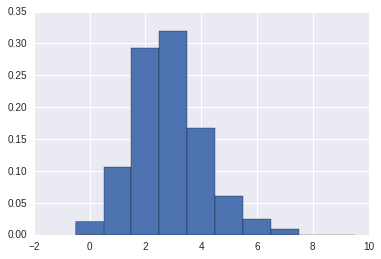

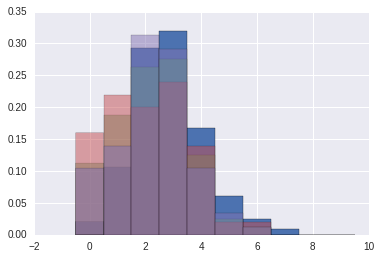

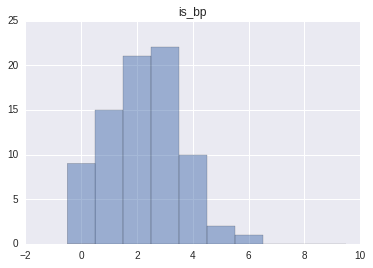

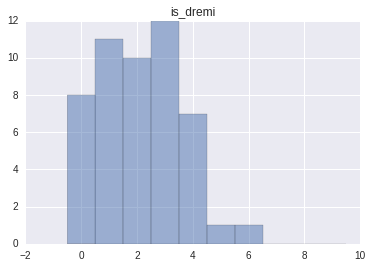

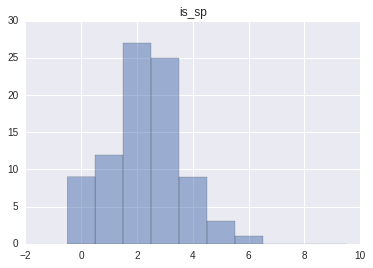

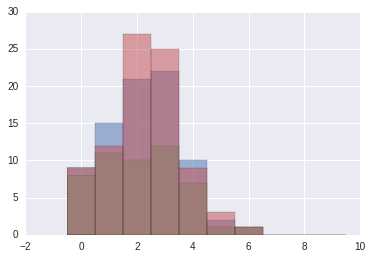

In [233]:
plt.hist(pair_dat_wo, bins=bins,normed=True)
plt.figure()
plt.hist(pair_dat_wo, bins=bins,normed=True)
print(np.mean(pair_dat_wo))
 
hittab_fil = (hittab['marker'].isin(not_used_effects['marker']) &
       hittab['target'].isin(not_used_effects['target'])) == False 



#plt.hist(sp_dist_hits_nonsign.dropna(), bins=bins,normed=True, alpha=0.5)
cols= ['is_bp', 'is_dremi','is_sp']
for c in cols:
    fil = (hittab[c] == True) & hittab_fil
    tdist = pair_dat_wo.loc[[(row['marker'],row['target']) for idx, row in hittab.loc[fil].iterrows()]]
    plt.hist(tdist, bins=bins,normed=True, alpha=0.5)
    print([c, tdist.mean()])


for c in cols:
    plt.figure()
    fil = (hittab[c] == True) & hittab_fil
    tdist = pair_dat_wo.loc[[(row['marker'],row['target']) for idx, row in hittab.loc[fil].iterrows()]]

    plt.hist(tdist, bins=bins, alpha=0.5)
    plt.title(c)
    
plt.figure()
for c in cols:
    fil = (hittab[c] == True) & hittab_fil
    tdist = pair_dat_wo.loc[[(row['marker'],row['target']) for idx, row in hittab.loc[fil].iterrows()]]
    plt.hist(tdist, bins=bins, alpha=0.5)